In [1]:
import cptac
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statistics
import parse_correlations_dataframe as get_corr
import copy

cptac warning: Your version of cptac (0.8.5) is out-of-date. Latest is 0.8.6. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-147bbc873c03>, line 1)


In [2]:
cptac.download("endometrial")

en = cptac.Endometrial()

# Beta-catenin in Endometrial Notebook

The purpose of this notebook is to compare mutated CTNNB1 genes with non mutated genes in cancer cells.

In [3]:
beta_corr = get_corr.get_data(cancer_type=["endometrial"], tissue_type=["tumor"], genes = ["CTNNB1"], get_corr=True, get_r2=True, get_p=True)
corr = list(beta_corr["Correlation"])[0]
corr 

0.29272750009956416

In [19]:
beta_corr.head()

,Cancer_Type,Tissue_Type,Gene,Correlation,P-value,R-squared
38134,Endometrial,tumor,CTNNB1,0.292728,0.003993,0.085689


In [4]:
trans_prot = en.join_omics_to_omics(df1_name='proteomics', df2_name='transcriptomics')

cptac warning: transcriptomics data was not found for the following samples, so transcriptomics data columns were filled with NaN for these samples: C3L-00563.N, C3L-00605.N, C3L-00769.N, C3L-00770.N, C3L-00771.N, C3L-00930.N, C3L-00947.N, C3L-00963.N, C3L-01246.N, C3L-01249.N, C3L-01252.N, C3L-01256.N, C3L-01257.N, C3L-01744.N, C3N-00200.N, C3N-00729.N, C3N-01211.N, NX1.N, NX10.N, NX11.N, NX12.N, NX13.N, NX14.N, NX15.N, NX16.N, NX17.N, NX18.N, NX2.N, NX3.N, NX4.N, NX5.N, NX6.N, NX7.N, NX8.N, NX9.N (<ipython-input-4-be6fcf8102c9>, line 1)


In [20]:
trans_prot.head()

Name,A1BG_proteomics,A2M_proteomics,A2ML1_proteomics,A4GALT_proteomics,AAAS_proteomics,AACS_proteomics,AADAT_proteomics,AAED1_proteomics,AAGAB_proteomics,AAK1_proteomics,...,ZWILCH_transcriptomics,ZWINT_transcriptomics,ZXDA_transcriptomics,ZXDB_transcriptomics,ZXDC_transcriptomics,ZYG11A_transcriptomics,ZYG11B_transcriptomics,ZYX_transcriptomics,ZZEF1_transcriptomics,ZZZ3_transcriptomics
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,-1.180,-0.8630,-0.802,0.222,0.2560,0.6650,1.2800,-0.3390,0.412,-0.664,...,11.06,10.73,8.40,9.78,10.88,5.93,11.52,10.23,11.50,11.47
C3L-00008,-0.685,-1.0700,-0.684,0.984,0.1350,0.3340,1.3000,0.1390,1.330,-0.367,...,10.87,11.43,8.39,9.14,10.38,7.25,11.64,10.64,11.26,11.57
C3L-00032,-0.528,-1.3200,0.435,NaN,-0.2400,1.0400,-0.0213,-0.0479,0.419,-0.500,...,10.06,10.13,8.35,9.27,10.46,6.85,11.60,10.21,11.51,11.09
C3L-00090,-1.670,-1.1900,-0.443,0.243,-0.0993,0.7570,0.7400,-0.9290,0.229,-0.223,...,10.29,10.41,9.10,9.59,10.15,7.89,11.90,10.21,11.34,11.51
C3L-00098,-0.374,-0.0206,-0.537,0.311,0.3750,0.0131,-1.1000,NaN,0.565,-0.101,...,10.36,11.24,8.60,9.44,11.80,9.32,11.97,9.77,11.37,12.35


In [5]:
beta_multi = en.multi_join({'proteomics': 'CTNNB1', 'transcriptomics':'CTNNB1', 'somatic_mutation' : 'CTNNB1'}, tissue_type = "tumor")


In [38]:
beta_multi.head()

Name,CTNNB1_proteomics,CTNNB1_transcriptomics,CTNNB1_Mutation,CTNNB1_Location,CTNNB1_Mutation_Status
Patient_ID,,,,,
C3L-00006,0.80300,14.38,NaN,NaN,NaN
C3L-00008,0.42600,14.60,NaN,NaN,NaN
C3L-00032,0.00891,15.07,NaN,NaN,NaN
C3L-00090,0.78800,14.56,NaN,NaN,NaN
C3L-00098,-0.40200,14.47,NaN,NaN,NaN


In [66]:
catenin = []
for index, i in enumerate(beta_multi["CTNNB1_Location"]):
    
    if (type(i) == list):

        if(len(i) == 1):
            if (i[0][3] == '3') and (i[0][4] == '3'):
                catenin.append(index)
            if ((i[0][3] == '3') and (i[0][4] == '7')):
                catenin.append(index)
            if ((i[0][3] == '3') and (i[0][4] == '2')):
                catenin.append(index)
            if ((i[0][3] == '3') and (i[0][4] == '4')):
                catenin.append(index)
            if ((i[0][3] == '4') and (i[0][4] == '1')):
                catenin.append(index)
            if ((i[0][3] == '4') and (i[0][4] == '5')):
                catenin.append(index)
        if (len(i) > 1):
            for j in i:
                
                if (j[3] == '3') and (j[4] == '3'):
                    catenin.append(index)
                    break
                if ((j[3] == '3') and (j[4] == '7')):
                    catenin.append(index)
                    break
                if ((j[3] == '3') and (j[4] == '2')):
                    catenin.append(index)
                    break
                if ((j[3] == '3') and (j[4] == '4')):
                    catenin.append(index)
                    break
                if ((j[3] == '4') and (j[4] == '1')):
                    catenin.append(index)
                    break
                if ((j[3] == '4') and (j[4] == '5')):
                    catenin.append(index)
                    break

In [7]:
trans_col = list(beta_multi['CTNNB1_transcriptomics'])
prot_col = list(beta_multi['CTNNB1_proteomics'])
label_col = []
index_col = []
for i in range(len(trans_col)):
    if i in catenin:
        label_col.append("Mutation")
    else:
        label_col.append("Wild_type")
    index_col.append(i)
    

In [8]:
beta_df = pd.DataFrame({"Label" : label_col, "Proteomics" : prot_col, "Transcriptomics" : trans_col })

In [22]:
beta_df.head()

,Label,Proteomics,Transcriptomics
0,Wild_type,0.80300,14.38
1,Wild_type,0.42600,14.60
2,Wild_type,0.00891,15.07
3,Wild_type,0.78800,14.56
4,Wild_type,-0.40200,14.47


In [9]:
is_mutation = beta_df['Label'] == 'Mutation'
is_wild_type = beta_df['Label'] == 'Wild_type'

In [10]:
#beta-catenin and wild type statistical values
beta_correlation,beta_pval = scipy.stats.pearsonr(beta_df[is_mutation]['Proteomics'], beta_df[is_mutation]['Transcriptomics'])
wildT_correlation,wildT_pval = scipy.stats.pearsonr(beta_df[is_wild_type]['Proteomics'], beta_df[is_wild_type]['Transcriptomics'])
beta_slope, beta_intercept, beta_r_value, beta_p_value, beta_std_err = stats.linregress(beta_df[is_mutation]['Proteomics'], beta_df[is_mutation]['Transcriptomics'])
wildT_slope, wildT_intercept, wildT_r_value, wildT_p_value, wildT_std_err = stats.linregress(beta_df[is_wild_type]['Proteomics'], beta_df[is_wild_type]['Transcriptomics'])
beta_r_sqrd = beta_r_value ** 2
wildT_r_sqrd = wildT_r_value ** 2
r2_delta = beta_r_sqrd - wildT_r_sqrd
print("Beta catenin correlation: " + str(beta_correlation))
print("Wild type correlation: " + str(wildT_correlation))
print("Beta catenin R2: " + str(beta_r_sqrd))
print("Wild type R2: " + str(wildT_r_sqrd))
print("R2 Delta : " + str(r2_delta))



Beta catenin correlation: 0.34082338655621236
Wild type correlation: 0.099528477948329
Beta catenin R2: 0.11616058082364539
Wild type R2: 0.009905917922710991
R2 Delta : 0.1062546629009344


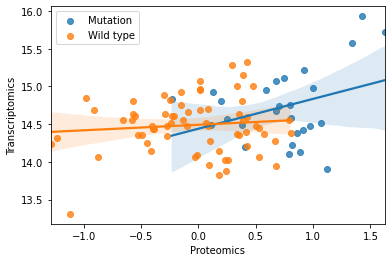

In [11]:
ax = sns.regplot( x = 'Proteomics', y= 'Transcriptomics',  data = beta_df[is_mutation], label = "Mutation")
ax = sns.regplot( x = 'Proteomics', y= 'Transcriptomics',  data = beta_df[is_wild_type], label = "Wild type")
ax.legend(loc="best")
plt.show()

In [12]:
beta_df['Label']

0     Wild_type
1     Wild_type
2     Wild_type
3     Wild_type
4     Wild_type
        ...    
90    Wild_type
91    Wild_type
92    Wild_type
93    Wild_type
94    Wild_type
Name: Label, Length: 95, dtype: object

In [13]:
counter = 0
for i in np.random.permutation(beta_df['Label']):
    if i == "Mutation":
        counter += 1
counter

27

In [14]:
permu_df = copy.deepcopy(beta_df)

In [15]:
permu_df['Label'] = np.random.permutation(permu_df['Label'])

In [16]:
permutation_list = []
for i in range(10000):
    permu_df['Label'] = np.random.permutation(permu_df['Label'])
    permu_is_mutation = permu_df['Label'] == 'Mutation'
    permu_is_wild_type = permu_df['Label'] == 'Wild_type'
    beta_slope, beta_intercept, beta_r_value, beta_p_value, beta_std_err = stats.linregress(permu_df[permu_is_mutation]['Proteomics'], permu_df[permu_is_mutation]['Transcriptomics'])
    wildT_slope, wildT_intercept, wildT_r_value, wildT_p_value, wildT_std_err = stats.linregress(permu_df[permu_is_wild_type]['Proteomics'], permu_df[permu_is_wild_type]['Transcriptomics'])
    permu_beta_r2 = beta_r_value ** 2
    permu_wildT_r2 = wildT_r_value ** 2
    delta = permu_beta_r2 - permu_wildT_r2
    permutation_list.append(delta)
    

In [17]:
permutation_list

[0.302515860130643,
 0.25956232596177153,
 -0.14125454797621614,
 -0.1125945351840015,
 -0.01642098173071989,
 0.14960903508935203,
 0.14075248239653265,
 -0.11907729796440063,
 -0.10089518918736567,
 0.32852545843549297,
 0.26401691680196726,
 0.15085963888558443,
 -0.12689328414596443,
 -0.16986807562243766,
 0.05718114356407991,
 -0.009996516016058152,
 -0.14456438926402385,
 -0.13035547695419702,
 0.011767671242681951,
 0.08160267025960914,
 -0.12157899920320599,
 0.06459897884880789,
 -0.07237247051053501,
 0.04942652431847806,
 0.07149682484733515,
 0.20071769396265032,
 -0.054808560520392936,
 -0.10238080312091083,
 -0.05178030960353942,
 -0.007974181715380904,
 -0.01923122080567856,
 -0.13860968761663411,
 0.009238366748549165,
 0.11295240214347711,
 -0.07811693457254834,
 0.18485786050622377,
 0.12290081789121438,
 0.006661137484002724,
 0.16257885593080484,
 0.024846259773363993,
 -0.09746802707527519,
 -0.13091002148841804,
 0.01564075692081425,
 0.07791338149109982,
 0.0598

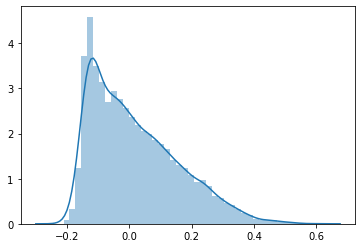

In [18]:
sns.distplot(permutation_list)